In [1]:
import numpy as np

In [2]:
def eucledian_dist(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)

In [3]:
class KMeans:
    def __init__(self, k = 5, max_iters = 1000):
        self.k = k
        self.max_iters = max_iters
        
        self.clusters = [[] for _ in range(self.k)]
        self.centroids = []
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        random_sample_idxs = np.random.choice(self.n_samples, self.k, replace = False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
            centroids_old  = self.centroids
            self.centroids = self._get_centroid(self.clusters)
        
            if self._is_converged(centroids_old, self.centroids):
                break
        return self._get_cluster_labels(self.clusters)
            
        
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
        
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        distances = [eucledian_dist(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
                                    
    def _get_centroid(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis = 0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        distances = [eucledian_dist(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

In [4]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [7]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [8]:
km = KMeans()
predictions = km.predict(X)

/Users/onkarthorat/opt/anaconda3/envs/final/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/onkarthorat/opt/anaconda3/envs/final/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [9]:
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

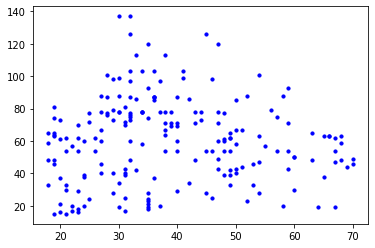

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[predictions == 0, 0], X[predictions == 0, 1], s= 10, c = 'red')
plt.scatter(X[predictions == 1, 0], X[predictions == 1, 1], s= 10, c = 'blue')
plt.scatter(X[predictions == 2, 0], X[predictions == 2, 1], s= 10, c = 'green')
plt.scatter(X[predictions == 3, 0], X[predictions == 3, 1], s= 10, c = 'magenta')
plt.scatter(X[predictions == 4, 0], X[predictions == 4, 1], s= 10, c = 'cyan')

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = kmeans.fit_predict(X)

In [12]:
y_km

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

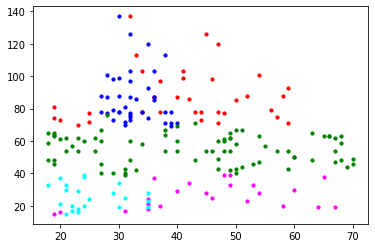

In [13]:
plt.figure()
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s= 10, c = 'red')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s= 10, c = 'blue')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s= 10, c = 'green')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s= 10, c = 'magenta')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s= 10, c = 'cyan')